# *0. Read the data*

In [1]:
import io
import numpy as np
import pandas as pd

# Seed used in this work
seed = 12

In [2]:
# Reading file
data = pd.read_csv('/kaggle/input/cardiovascular-risk-data/data_cardiovascular_risk.csv')
data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


**Variables Description**

**Demographic**  
Sex: male or female ("M" or "F")  
Age: Age of the patient (Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)  
Education: The level of education of the patient (categorical values - 1,2,3,4)  

**Behavioral**  
is_smoking: whether or not the patient is a current smoker ("YES" or "NO")  
Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)  

**Medical history**  
BP Meds: whether or not the patient was on blood pressure medication (Nominal)  
Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)  
Prevalent Hyp: whether or not the patient was hypertensive (Nominal)  
Diabetes: whether or not the patient had diabetes (Nominal)  

**Current medical**  
Tot Chol: total cholesterol level 
Sys BP: systolic blood pressure
Dia BP: diastolic blood pressure
BMI: Body Mass Index
Heart Rate: heart rate
Glucose: glucose level

**Predict target**  
10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)  

*This [dataset](https://www.kaggle.com/datasets/mamta1999/cardiovascular-risk-data) is uploaded by 
Mamta Sharma*.

In [3]:
# Check data types
print(data.dtypes)

id                   int64
age                  int64
education          float64
sex                 object
is_smoking          object
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object


# *1. Data Wrangling*

In [4]:
# Drop non-relevant column
df = data.drop('id', axis=1)
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
print(df.shape[0], 'records and ', df.shape[1], ' attributes.')

3390 records and  16  attributes.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


In [7]:
df.describe()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [8]:
# Missing values
(df.isnull().sum()/data.shape[0]*100).to_frame().rename(columns={0: 'Null %'})

,Null %
age,0.000000
education,2.566372
sex,0.000000
is_smoking,0.000000
cigsPerDay,0.648968
BPMeds,1.297935
prevalentStroke,0.000000
prevalentHyp,0.000000
diabetes,0.000000
totChol,1.120944


In [9]:
# Fill missing values
df['education'].fillna(df['education'].value_counts().idxmax(), inplace=True)
df['cigsPerDay'].fillna(df['cigsPerDay'].median(), inplace=True)
df['BPMeds'].fillna(df['BPMeds'].value_counts().idxmax(), inplace=True)
df['totChol'].fillna(df['totChol'].median(), inplace=True)
df['BMI'].fillna(df['BMI'].median(), inplace=True)
df['heartRate'].fillna(df['heartRate'].median(), inplace=True)
df['glucose'].fillna(df['glucose'].median(), inplace=True)

In [10]:
df.isnull().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

# *2. EDA (Exploratory Data Analysis)*

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

## **2.1 Demographic**

#### 2.1.1 Age Analysis

In [12]:
df['age'].describe()

count    3390.000000
mean       49.542183
std         8.592878
min        32.000000
25%        42.000000
50%        49.000000
75%        56.000000
max        70.000000
Name: age, dtype: float64

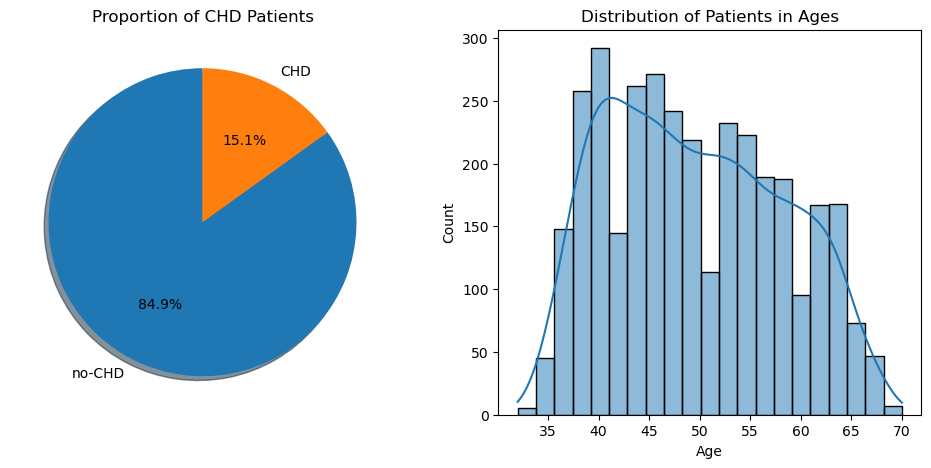

In [13]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12,5))

# Proportion of CHD Patients
ax0.pie(df['TenYearCHD'].value_counts(), labels=['no-CHD', 'CHD'], startangle=90, shadow=True, autopct='%.1f%%')
ax0.set_title('Proportion of CHD Patients')

# Age Distribution of All Patients
sns.histplot(data=df, x='age', kde=True, ax=ax1)
ax1.set_title('Distribution of Patients in Ages')
ax1.set_xlabel('Age')

plt.show()

Approximately 15% of individuals in this dataset are at risk of developing Coronary Heart Disease (CHD) within a 10-year period. The visualization further illustrates that the dataset predominantly comprises middle-aged individuals, with the highest density observed in the age range of 40-45 years.

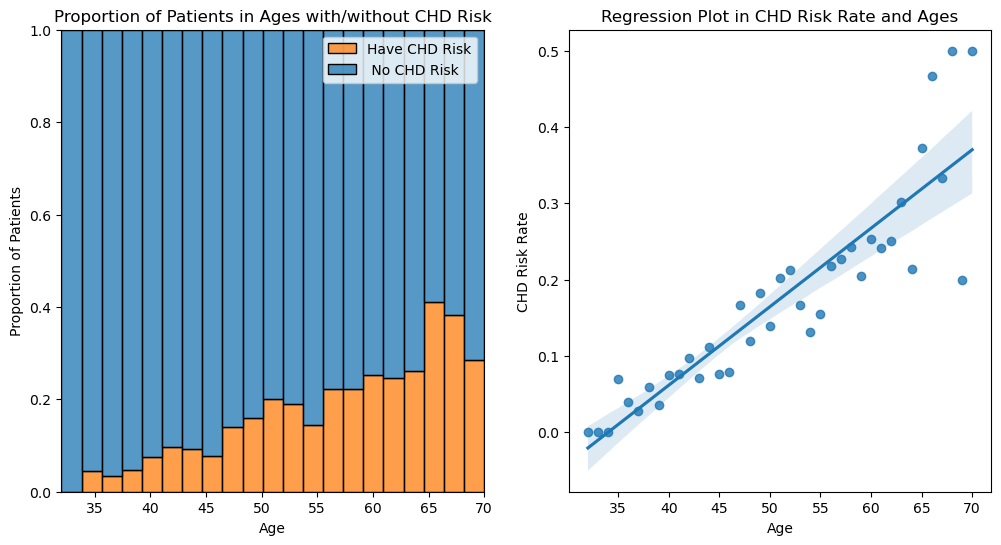

In [14]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12,6))

# Proportion of Patients in Ages with/without CHD Risk
sns.histplot(data=df, x='age', hue='TenYearCHD', multiple='fill', ax=ax0)
ax0.set_title('Proportion of Patients in Ages with/without CHD Risk')
ax0.set_xlabel('Age')
ax0.set_ylabel('Proportion of Patients')
ax0.legend(['Have CHD Risk', ' No CHD Risk'])

# Regression Plot in CHD Risk Rate and Ages
sns.regplot(x=df.groupby('age')['TenYearCHD'].mean().index,
            y=df.groupby('age')['TenYearCHD'].mean().values, ax=ax1)
ax1.set_xlabel('Age')
ax1.set_ylabel('CHD Risk Rate')
ax1.set_title('Regression Plot in CHD Risk Rate and Ages')

plt.show()

From the regression plot of CHD rates and age, it is evident that the likelihood of developing CHD is dependent on age. The risk of CHD rate shows a gradual increase as age progresses, indicating a positive correlation between age and the risk of CHD, as indicated by the regression line.

#### 2.1.2 Education Level Anlaysis

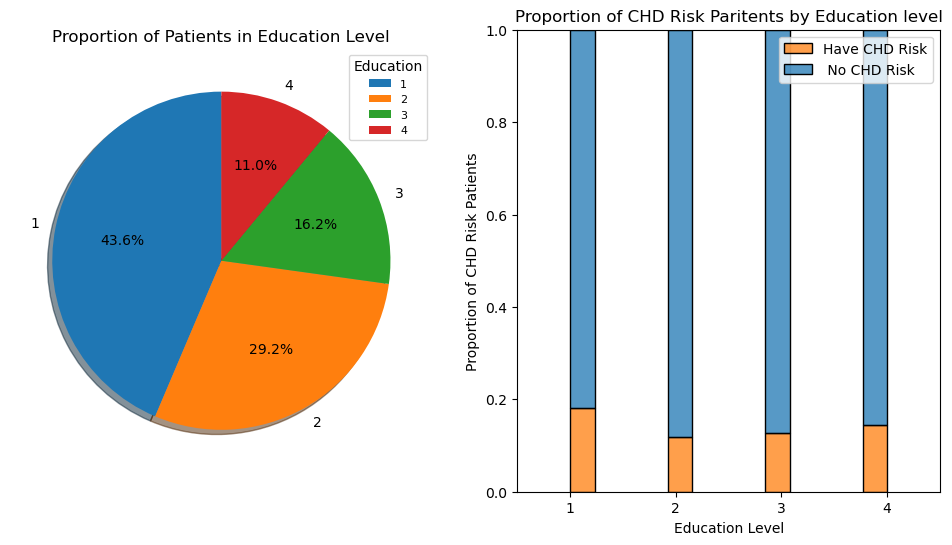

In [15]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12,6))

# Proportion of Patients in Education Level
ax0.pie(df['education'].value_counts(), labels=['1', '2', '3', '4'], startangle=90, shadow=True, autopct='%.1f%%')
ax0.set_title('Proportion of Patients in Education Level')
ax0.legend(title='Education', labels=['1','2','3','4'], fontsize=8)

# Proportion of CHD Risk Rate by Education level
sns.histplot(data=df, x='education' , hue='TenYearCHD', multiple='fill', ax=ax1)
ax1.set_ylabel('Proportion of CHD Risk Patients')
ax1.set_xlabel('Education Level')
ax1.set_title('Proportion of CHD Risk Paritents by Education level')
ax1.set_xlim(0.5, 4.5)
ax1.set_xticks([1,2,3,4])
ax1.legend(['Have CHD Risk', ' No CHD Risk'])

plt.show()

The pie chart illustrates that as the education level increases, the number of patients decreases proportionally. Furthermore, the histogram reveals the proportion of individuals at risk of developing CHD based on their education levels. It demonstrates that the lowest education level corresponds to the highest CHD risk rate, approximately 20%, among all education levels. On the other hand, the other education levels exhibit a similar CHD risk rate of around 15%.

In conclusion, the analysis suggests that there is no significant positive association between education level and the risk of developing CHD. However, it is worth considering that individuals with the lowest education level may have a higher risk of CHD.

#### 2.1.3 Patient Gender Analysis

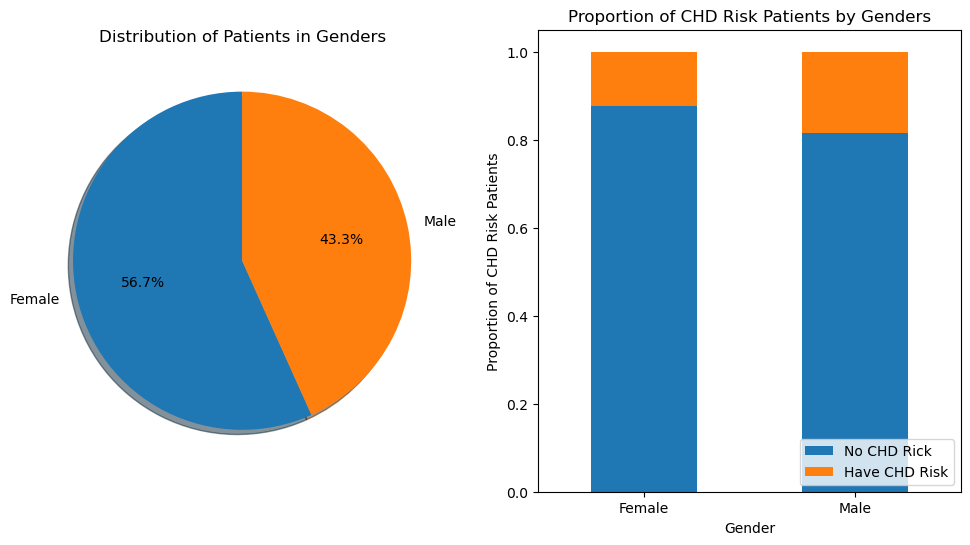

In [16]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12,6))

# Distribution of Patients in Gender
ax0.pie(df['sex'].value_counts(), labels=['Female', 'Male'], startangle=90, shadow=True, autopct='%.1f%%')
ax0.set_title('Distribution of Patients in Genders')

# Proportion of CHD Risk Patients by Genders
sex_counts = df.groupby(['sex', 'TenYearCHD']).size().unstack()
sex_proportions = sex_counts.div(sex_counts.sum(axis=1), axis=0)
sex_proportions.plot(kind='bar', stacked=True, ax=ax1)
ax1.set_ylabel('Proportion of CHD Risk Patients')
ax1.set_xlabel('Gender')
ax1.set_xticklabels(['Female', 'Male'], rotation=0)
ax1.set_title('Proportion of CHD Risk Patients by Genders')
ax1.legend(['No CHD Rick', 'Have CHD Risk'], loc='lower right')

plt.show()

The pie chart indicates that the number of female patients is higher than the number of male patients. However, when we specifically analyze the patients at risk of developing Coronary Heart Disease (CHD) based on their sex, we observe that male patients have a higher risk compared to female patients.

## 2.2 Patient Behavior

#### 2.2.1 Smoking Patients

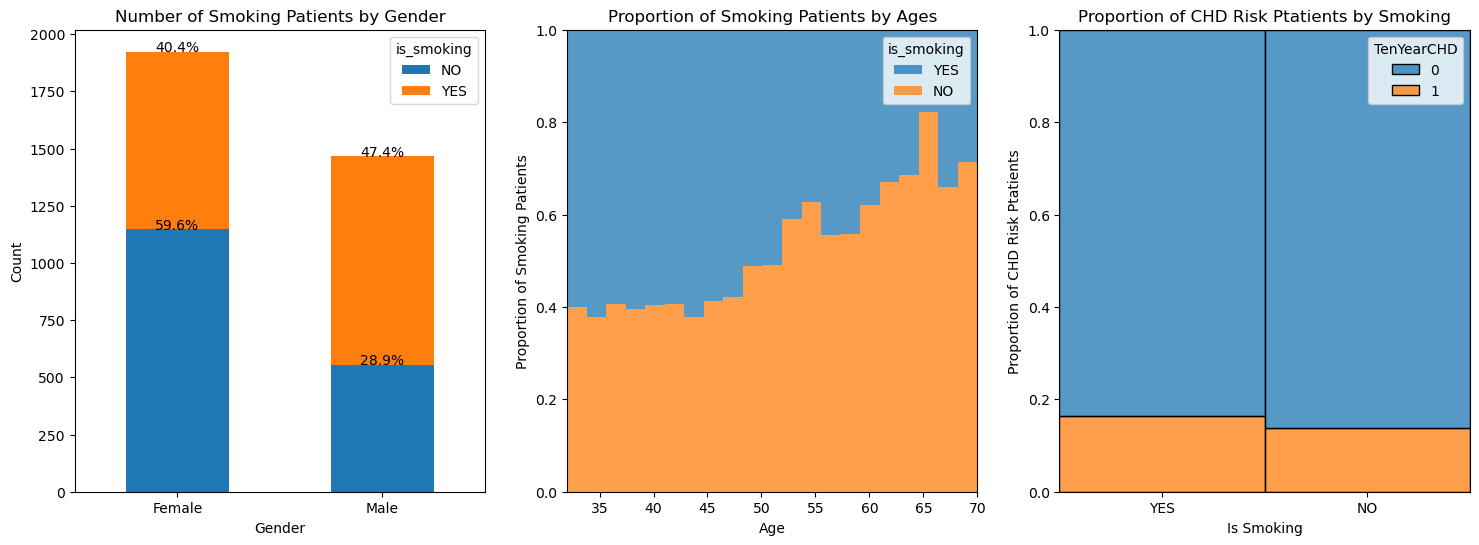

In [17]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(18, 6))

# Check Proportion of Smoking Patients by their Sex
smoke_counts_sex = df.groupby(['sex', 'is_smoking']).size().unstack()
smoke_counts_sex = smoke_counts_sex.rename(index={'M': 'Male', 'F': 'Female'})
smoke_counts_sex.plot.bar(ax=ax0, stacked=True)

totals_sex = smoke_counts_sex.sum(axis=1)
for p in ax0.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    percentage = height / totals_sex[int(x)]
    ax0.annotate(f'{percentage:.1%}', (x + width/2, y + height), ha='center')

ax0.set_title('Number of Smoking Patients by Gender')
ax0.set_ylabel('Count')
ax0.set_xlabel('Gender')
ax0.set_xticklabels(ax0.get_xticklabels(), rotation=0)

# Check the Proportion of Smoking Patients by Ages
sns.histplot(data=df, x='age', hue='is_smoking', multiple='fill', edgecolor=None, ax=ax1)
ax1.set_title('Proportion of Smoking Patients by Ages')
ax1.set_ylabel('Proportion of Smoking Patients')
ax1.set_xlabel('Age')

# Proportion of CHD Risk Ptatients by Smoking
sns.histplot(data=df, x='is_smoking', hue='TenYearCHD', multiple='fill', ax=ax2)
ax2.set_title('Proportion of CHD Risk Ptatients by Smoking')
ax2.set_ylabel('Proportion of CHD Risk Ptatients')
ax2.set_xlabel('Is Smoking')

plt.show()

From the left figure, we can observe that the proportion of male smokers is higher than that of females, suggesting a higher prevalence of smoking among men in this study. Furthermore, as shown in the middle figure, the proportion of smokers tends to increase with age. However, the right figure reveals a weak association between smoking and the risk of Coronary Heart Disease (CHD). The difference in CHD risk between smokers and non-smokers is only about 5%.

These findings indicate that smoking is more prevalent among males and tends to increase with age. However, based on the available data, the relationship between smoking and the risk of CHD is not strongly pronounced.

#### 2.2.2 Number of Daily Cigarettes by Patients

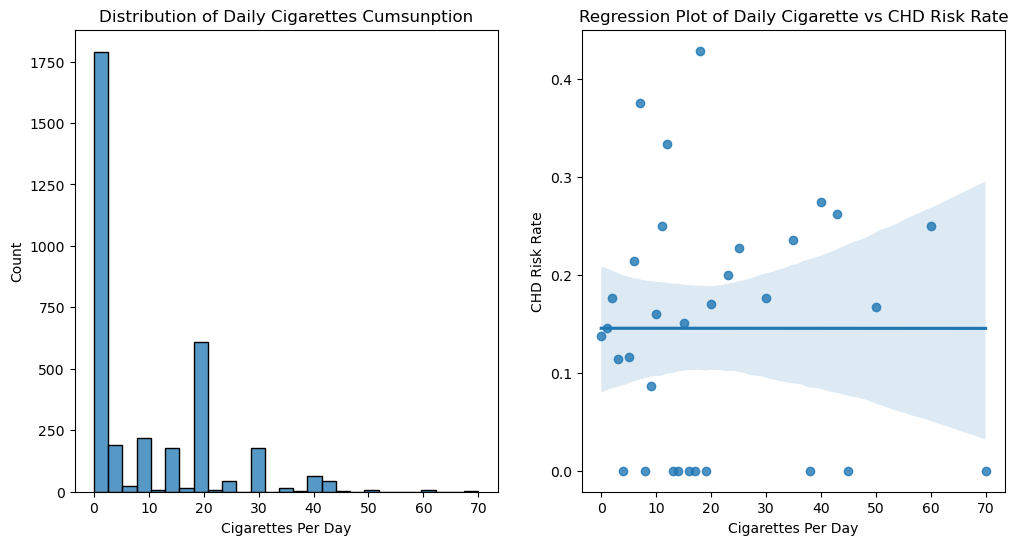

In [18]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 6))

# Distribution of Daily Cigarettes Cumsunption
sns.histplot(x=df['cigsPerDay'], ax=ax0)
ax0.set_xlabel('Cigarettes Per Day')
ax0.set_title('Distribution of Daily Cigarettes Cumsunption')

# Regression Plot of Daily Cigarette vs CHD Risk Rate
sns.regplot(x=df.groupby(['cigsPerDay'])['TenYearCHD'].mean().index,
            y=df.groupby(['cigsPerDay'])['TenYearCHD'].mean().values, ax=ax1)
ax1.set_xlabel('Cigarettes Per Day')
ax1.set_ylabel('CHD Risk Rate')
ax1.set_title('Regression Plot of Daily Cigarette vs CHD Risk Rate')

plt.show()

The histogram depicts that the majority of patients consume fewer than 5 cigarettes per day. However, there is a significant deviation in the daily cigarette consumption among patients, indicating a wide distribution of cigarette intake.

The regression line analysis indicates a weak correlation between the incidence of coronary heart disease and the number of cigarettes smoked per day. This finding suggests that the association between smoking and coronary heart disease can vary among individuals, and other factors may contribute to the development of the disease.

## **2.3 Medical History**

In [19]:
# Define pie and bar chart
def get_pie_bar(category, label, title):
    fig, (ax0, ax1)=plt.subplots(1, 2, figsize=(10,4))
    proportion = df[category].value_counts()/df[category].value_counts().sum()
    ax0.pie(proportion, startangle=90, shadow=True,
            labels=['No ' + label, label], autopct='%.1f%%', explode=(0.1, 0))
    ax0.set_title('Proportion of Patients ' + title)

    chd_counts = df.groupby([category, 'TenYearCHD']).size().unstack()
    chd_proportions = chd_counts.div(chd_counts.sum(axis=1), axis=0)
    chd_proportions.plot(kind='bar', stacked=True, ax=ax1)
    ax1.set_title('Proportion of CHD by ' + category)
    ax1.set_xlabel('')
    ax1.set_ylabel('Proportion [%]')
    ax1.set_xticklabels(['No ' + label, label], rotation=0)
    ax1.legend(loc='lower left')

    for container in ax1.containers:
        for rect in container:
            width = rect.get_width()
            height = rect.get_height()
            x = rect.get_x()
            y = rect.get_y()
            ax1.annotate(f'{height:.1%}', xy=(x + width / 2, y + height / 2),
                         xytext=(0, 3), textcoords='offset points',
                         ha='center', va='center')
    plt.show()

#### 2.3.1 Blood Pressure Mediction

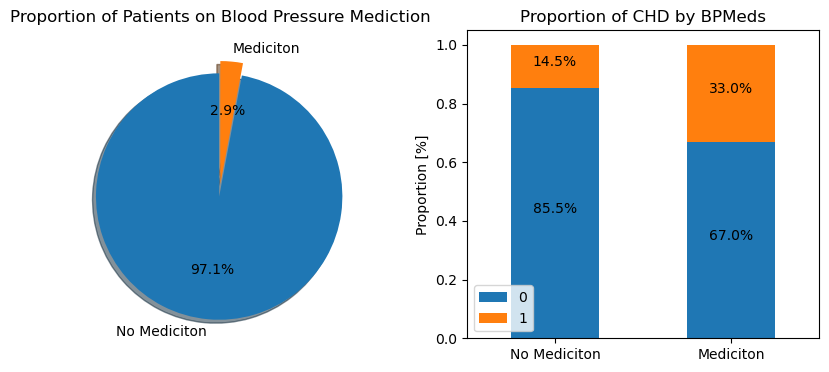

In [20]:
# Check the relation of BPMeds and CHD
get_pie_bar('BPMeds', 'Mediciton', 'on Blood Pressure Mediction')

In [21]:
df['BPMeds'].value_counts().to_frame()

,BPMeds
0.0,3290
1.0,100


From the bar charts, it is evident that the number of patients who are prescribed blood pressure medication, have a history of stroke or hypertension, and also have diabetes is approximately twice that of individuals without these conditions. However, when considering the information from the pie charts, it is worth noting that the number of samples for patients on blood pressure medication, stroke cases, and diabetes patients is significantly smaller compared to the number of samples for hypertensive patients. This imbalance in sample sizes can potentially affect the interpretation of the data and should be taken into consideration.

#### 2.3.2 Prevalent Stroke

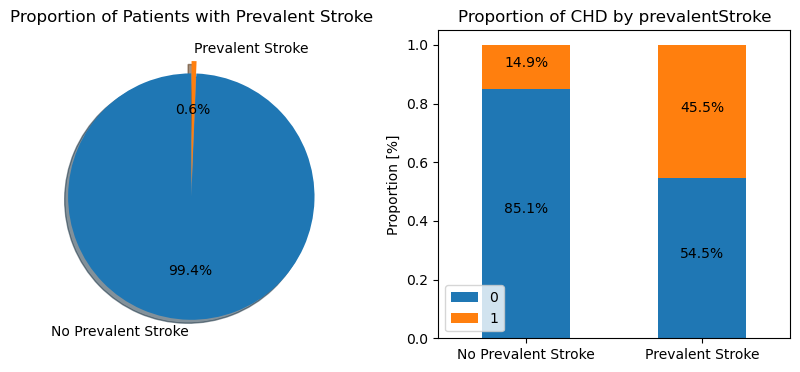

In [22]:
# Check the relation of prevalentStroke and CHD
get_pie_bar('prevalentStroke', 'Prevalent Stroke', 'with Prevalent Stroke')

In [23]:
df['prevalentStroke'].value_counts().to_frame()

,prevalentStroke
0,3368
1,22


The proportion of patients with a prevalent stroke is found to have up to three times the risk of developing CHD compared to those without a prevalent stroke. However, it should be noted that the class representing patients with a prevalent stroke has a significantly imbalanced sample distribution, with less than 1% of the total samples falling into this category. Therefore, considering the limited number of samples in this class, this attribute will not include in this work when training the model in order to avoid potential biases and unreliable predictions.

#### 2.3.3 Prevalent Hypertension

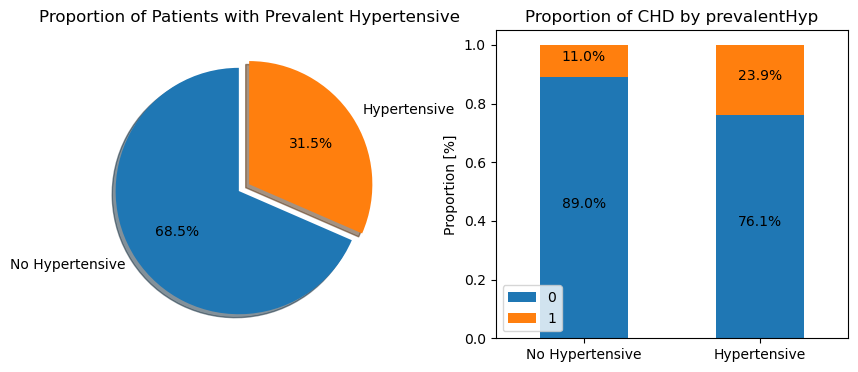

In [24]:
# Check the relation of prevalentHyp and CHD
get_pie_bar('prevalentHyp', 'Hypertensive', 'with Prevalent Hypertensive')

In [25]:
df['prevalentHyp'].value_counts()

0    2321
1    1069
Name: prevalentHyp, dtype: int64

The pie chart illustrates that approximately one-third of the patients in the dataset have prevalent hypertension. Additionally, the histogram analysis indicates that patients with prevalent hypertension have roughly twice the likelihood of developing coronary heart disease (CHD) compared to those without hypertension.

#### 2.3.4 Diabetes

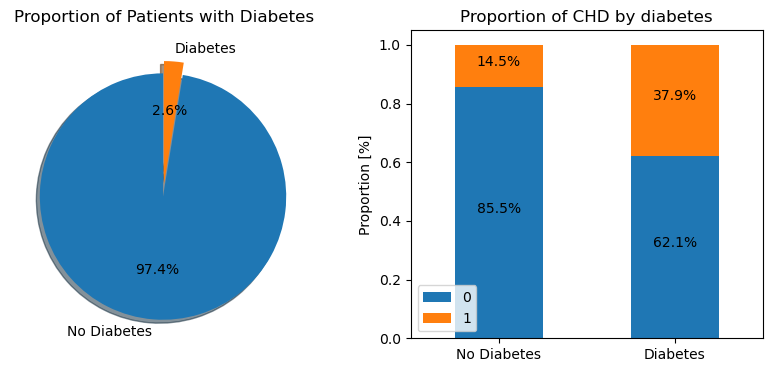

In [26]:
# Check the relation of diabetes and CHD
get_pie_bar('diabetes', 'Diabetes', 'with Diabetes')

In [27]:
df['diabetes'].value_counts()

0    3303
1      87
Name: diabetes, dtype: int64

The pie chart demonstrates that only a small percentage (2.6%) of the patients in the dataset have diabetes. This limited representation of diabetic patients raises concerns about the adequacy of the data for this attribute. Additionally, the histogram analysis reveals that patients with diabetes have more than twice the likelihood of developing coronary heart disease (CHD) compared to those without diabetes.

#### 2.3.5 Summarize of Medical History

The analysis of the patient's medical history reveals that individuals with certain medical conditions, such as diabetes, hypertension, prevalent stroke, and prevalent hypertension, have a higher likelihood of developing coronary heart disease (CHD). However, it is important to consider the imbalance in the sample distribution for these attributes.

Due to the limited representation of patients with these medical conditions in the dataset, the effectiveness and reliability of using these attributes as predictors for CHD may be compromised. The imbalanced sample distribution can lead to biased model predictions and potentially hinder the accuracy of the model.

To address this issue, further evaluation and potential data augmentation techniques should be considered. Data augmentation methods, such as oversampling the minority class or undersampling the majority class, can help balance the representation of different medical conditions and improve the model's performance.

## **2.4 Current medical**

According to the report from [CDC (Centers for Disease Control and Preventrion)](https://www.cdc.gov/bloodpressure/about.htm), the classified as follows:  

|Category|Systolic (mm-Hg)|Diastolic (mm-Hg)|
|--|--|--|
|Normal|<120|<80|
|Elevated|120-129|<80|
|Hypertension|≥130|≥80|

#### 2.4.1 Blood Pressure

In [28]:
# Copy the original df
med_df = df.copy()
# Create categorical columns
med_df.loc[(med_df['sysBP'] < 120) & (med_df['diaBP'] < 80), 'BP_Category'] = 'Normal'
med_df.loc[(med_df['sysBP'] >= 120) & (med_df['sysBP'] < 130) & (med_df['diaBP'] < 80), 'BP_Category'] = 'Elevated'
med_df.loc[(med_df['sysBP'] >= 130) | (med_df['diaBP'] >= 80), 'BP_Category'] = 'Hypertension'
# Define categorical colors
BP_colors = {'Normal': 'steelblue', 'Elevated': 'darkorange', 'Hypertension': 'firebrick'}

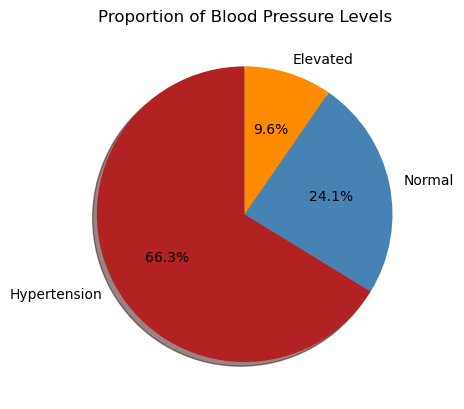

In [29]:
# Proportion of Blood Pressure Levels
plt.pie(med_df['BP_Category'].value_counts(), labels=med_df['BP_Category'].value_counts().index,
        startangle=90, shadow=True, autopct='%.1f%%',
        colors=[BP_colors[val] for val in med_df['BP_Category'].value_counts().index])
plt.title('Proportion of Blood Pressure Levels')
plt.show()

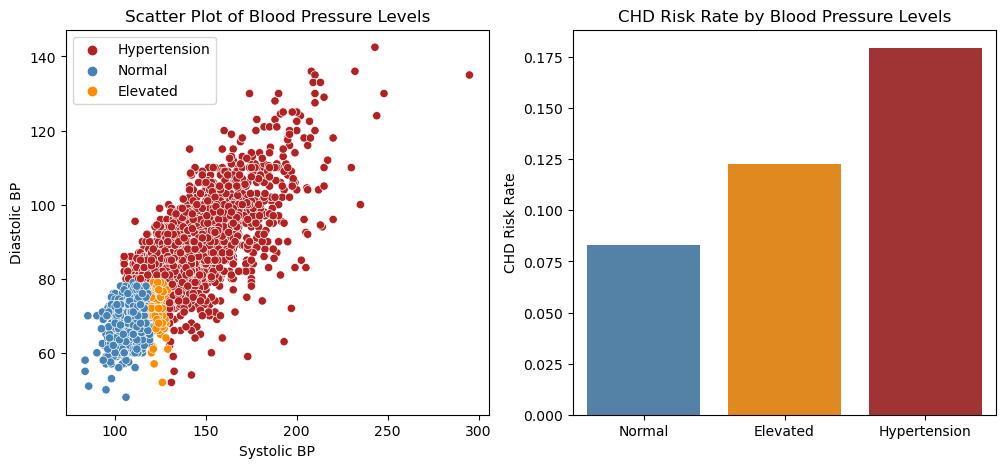

In [30]:
fig, (ax0,ax1) = plt.subplots(1, 2, figsize=(12,5))

# Scatter Plot of Blood Pressure Levels
sns.scatterplot(data=med_df, x='sysBP', y='diaBP', hue='BP_Category',
                palette=BP_colors, ax=ax0)
ax0.set_xlabel('Systolic BP')
ax0.set_ylabel('Diastolic BP')
ax0.set_title('Scatter Plot of Blood Pressure Levels')
ax0.legend(title='')

# CHD Risk Rate by Blood Pressure Levels
BP_CHD = med_df.groupby('BP_Category')['TenYearCHD'].mean().to_frame()
BP_CHD_sorted = BP_CHD.sort_values(by='TenYearCHD')
sns.barplot(data=BP_CHD_sorted, x=BP_CHD_sorted.index, y='TenYearCHD',palette=BP_colors, ax=ax1)
ax1.set_ylabel('CHD Risk Rate')
ax1.set_xlabel('')
ax1.set_title('CHD Risk Rate by Blood Pressure Levels')

plt.show()

Based on the scatter plot, it is evident that a significant proportion of individuals in this dataset have a risk of hypertension, as indicated by the higher values of systolic and diastolic blood pressure. This suggests that hypertension is prevalent among the participants.

Additionally, the bar chart provides insights into the relationship between hypertension risk categories and the rate of CHD. It shows that as the hypertension risk increases, the CHD rate also increases. This indicates a positive association between hypertension and the risk of developing coronary heart disease.

#### 2.4.2 Cholester Level

As reported by [Cleveland Clinic](https://my.clevelandclinic.org/health/articles/11920-cholesterol-numbers-what-do-they-mean), high cholesterol is having _*total cholesterol above 200 mg/dL*_. This condition is also called hyperlipidemia. The cholesterol levels are as follows:  

|Cholesterol Levels |Total Cholesterol (mg/dL)|
|--|--|
|Dangerous|≥240|
|At risk|200-239|
|Healthy|<200|

In [31]:
# Create categorical columns
med_df.loc[(med_df['totChol'] < 200), 'Chol_Category'] = 'Healthy'
med_df.loc[(med_df['totChol'] >= 200) & (med_df['totChol'] < 240), 'Chol_Category'] = 'At risk'
med_df.loc[(med_df['totChol'] >= 240), 'Chol_Category'] = 'Dangerous'
# Define categorical colors
Chol_colors = {'Healthy': 'steelblue', 'At risk': 'darkorange', 'Dangerous': 'firebrick'}

<function matplotlib.pyplot.show(close=None, block=None)>

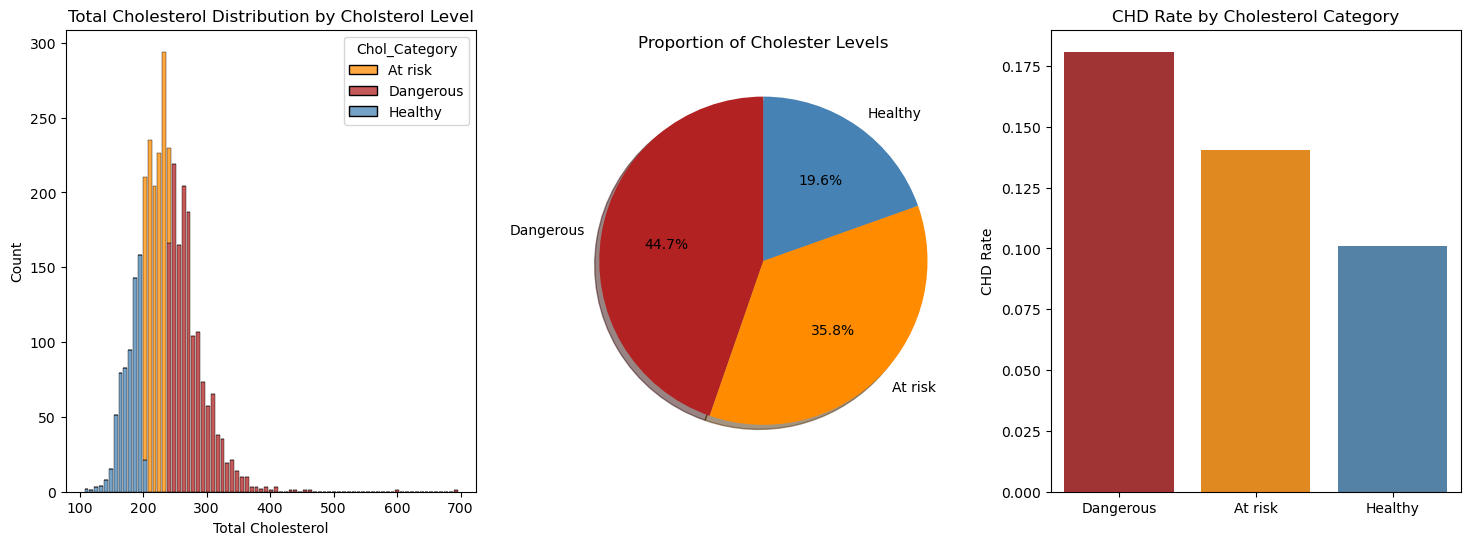

In [32]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(18,6))

# Total Cholesterol Distribution by Cholsterol Level
sns.histplot(data=med_df, x='totChol', multiple='stack', hue='Chol_Category',
             shrink=0.8, palette=Chol_colors, ax=ax0)
ax0.set_title('Total Cholesterol Distribution by Cholsterol Level')
ax0.set_xlabel('Total Cholesterol')

# Proportion of Cholester Levels
ax1.pie(med_df['Chol_Category'].value_counts(), labels=med_df['Chol_Category'].value_counts().index,
        startangle=90, shadow=True, autopct='%.1f%%',
        colors=[Chol_colors[val] for val in med_df['Chol_Category'].value_counts().index])
ax1.set_title('Proportion of Cholester Levels')

# CHD Rate by Cholesterol Category
med_df_sorted = med_df.sort_values(by='TenYearCHD')
sns.barplot(data=med_df_sorted, x='Chol_Category',y='TenYearCHD', palette=Chol_colors, errorbar=None, ax=ax2)
ax2.set_xlabel('')
ax2.set_ylabel('CHD Rate')
ax2.set_title('CHD Rate by Cholesterol Category')

plt.show

The histogram provides a clear division into three categories: healthy level, risk level (which has the highest number of samples), and dangerous level at high total cholesterol. This division allows for a better understanding of the distribution of cholesterol levels among the samples and helps identify the proportion of individuals at different risk levels.

From the pie chart, it can be observed that approximately 20% of the total samples belong to the healthy cholesterol level category. This suggests that the majority of people in this analysis are at risk of hyperlipidemia.

CHD rate by Cholesterol level further supports the notion that higher cholesterol levels increase the CHD rate. The bar chart demonstrates the increasing trend of CHD rate as cholesterol level progress. Additionally, it is also observed that this trend is similar to the blood pressure level, indicating a correlation between these two factors.

#### 2.4.3 BMI

Although BMI may vary depending on whether the person being measured is physically fit or not, it is still a widely used and measurable indicator for most individuals. **CDC** also provide the [standard weight status categories](https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html):

|Weight Status|BMI|
|--|--|
|Underweight|<18.5|
|Healthy|18.5–24.9|
|Overweight|25.0-29.9|
|Obesity|≥30.0|

In [33]:
# Create categorical column
med_df.loc[(med_df['BMI'] < 18.5), 'BMI_Category'] = 'Underweight'
med_df.loc[(med_df['BMI'] >= 18.5) & (med_df['BMI'] < 25), 'BMI_Category'] = 'Healthy'
med_df.loc[(med_df['BMI'] >= 25) & (med_df['BMI'] < 30), 'BMI_Category'] = 'Overweight'
med_df.loc[(med_df['BMI'] >= 30), 'BMI_Category'] = 'Obesity'
# Define categorical colors
BMI_colors = {'Underweight': 'forestgreen', 'Healthy': 'steelblue', 'Overweight': 'darkorange', 'Obesity': 'firebrick'}

<function matplotlib.pyplot.show(close=None, block=None)>

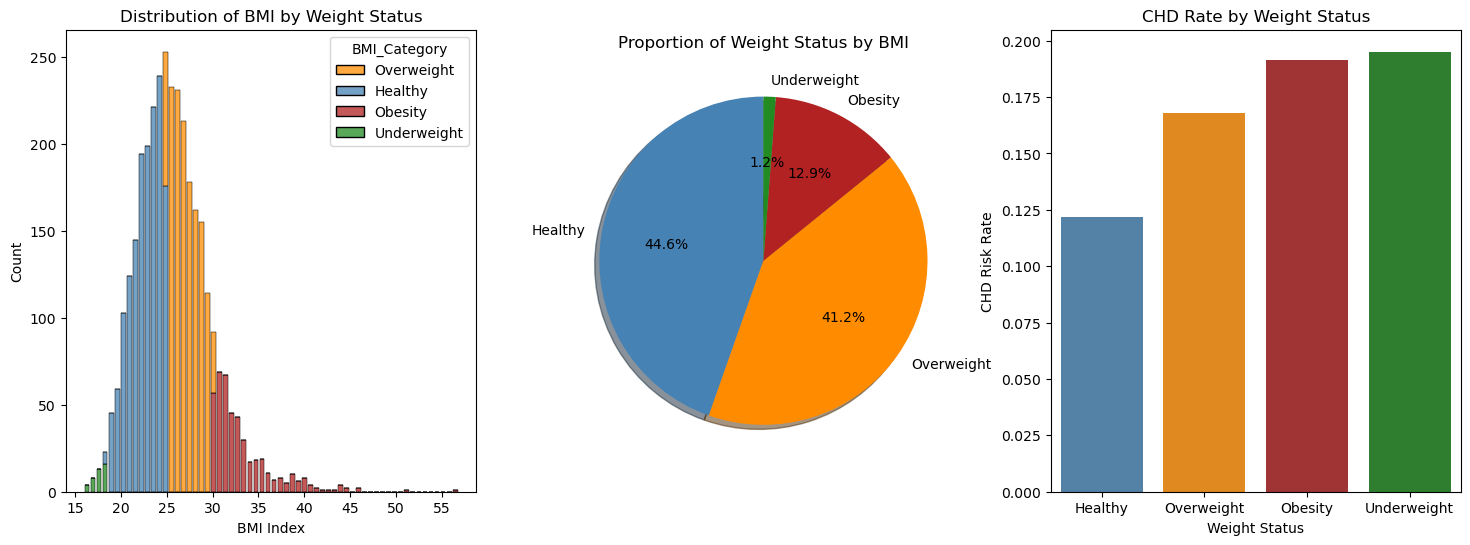

In [34]:
fig, (ax0,ax1,ax2) = plt.subplots(1,3,figsize=(18,6))

# Distribution of BMI by Weight Status
sns.histplot(data=med_df, x='BMI', multiple='stack', hue='BMI_Category',
             shrink=0.8, palette=BMI_colors, ax=ax0)
ax0.set_title('Distribution of BMI by Weight Status')
ax0.set_xlabel('BMI Index')

# Proportion of Weight Status by BMI
ax1.pie(med_df['BMI_Category'].value_counts(), labels=med_df['BMI_Category'].value_counts().index,
        startangle=90, shadow=True, autopct='%.1f%%',
        colors=[BMI_colors[val] for val in med_df['BMI_Category'].value_counts().index])
ax1.set_title('Proportion of Weight Status by BMI')

# CHD Rate by Weight Status
BMI_CHD = med_df.groupby('BMI_Category')['TenYearCHD'].mean().to_frame()
BMI_CHD_sorted = BMI_CHD.sort_values(by='TenYearCHD')
sns.barplot(data=BMI_CHD_sorted, x=BMI_CHD_sorted.index, y='TenYearCHD',palette=BMI_colors, ax=ax2)
ax2.set_title('CHD Rate by Weight Status')
ax2.set_xlabel('Weight Status')
ax2.set_ylabel('CHD Risk Rate')

plt.show

From the distribution histogram, it is evident that the majority of individuals in this dataset are categorized as healthy. However, a notable proportion of individuals are classified as overweight. The pie chart further illustrates that the Healthy and Overweight categories each account for more than 40% of the total, while the Underweight category represents a smaller percentage.

The histogram analysis illustrates a positive correlation between weight levels and the rate of Coronary Heart Disease (CHD). As weight increases, the CHD rate also tends to increase. Interestingly, the underweight level exhibits a similar CHD rate to the obesity level. This finding suggests a potential risk of CHD among individuals who are underweight. However, it is important to note that the Underweight category represents only a small percentage (1.2%) of the total samples. The limited number of underweight individuals may introduce noise and uncertainty into this observation, making the result less conclusive.

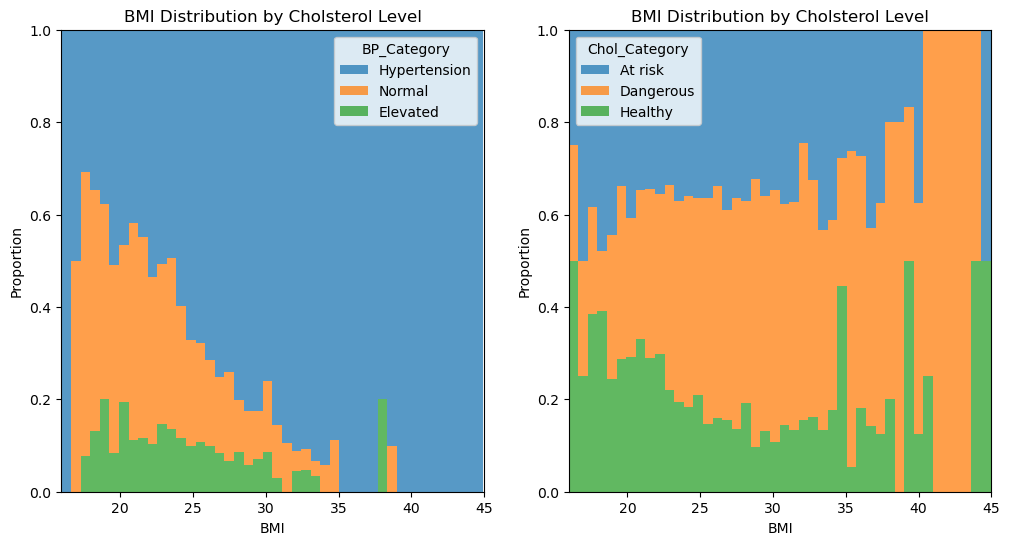

In [35]:
fig, (ax0,ax1) = plt.subplots(1,2,figsize=(12,6))

# BMI Distribution by Cholsterol Level
sns.histplot(data=med_df, x='BMI', hue='BP_Category', multiple='fill', edgecolor='none', ax=ax0)
ax0.set_title('BMI Distribution by Cholsterol Level')
ax0.set_xlabel('BMI')
ax0.set_ylabel('Proportion')
ax0.set_xlim(med_df['BMI'].min(), 45)

# BMI Distribution by Cholsterol Level
sns.histplot(data=med_df, x='BMI', hue='Chol_Category', multiple='fill', edgecolor='none', ax=ax1)
ax1.set_title('BMI Distribution by Cholsterol Level')
ax1.set_xlabel('BMI')
ax1.set_ylabel('Proportion')
ax1.set_xlim(med_df['BMI'].min(), 45)

plt.show()

As we know, there is a strong correlation between obesity and cardiovascular disease. While BMI measurement may not be 100% accurate, it can provide a reliable indication of whether an individual is overweight and can help assess their risk of developing cardiovascular disease.

The left plot illustrates the ratio of blood pressure levels across different BMI values. To ensure clarity, the maximum BMI value has been truncated due to the limited number of samples above 45. We observe a decreasing proportion of individuals with "Normal" blood pressure as BMI increases, while the proportion of individuals with "Hypertension" rises with higher BMI values. This suggests a potential association between elevated BMI and higher blood pressure levels.

Additionally, as BMI increases, the proportion of individuals with "Healthy" decreases, while the proportion of individuals with "Dangerous" blood pressure levels, increases accordingly.

#### 2.4.4 Heart Rate

According to information from the [British Heart Foundation](https://www.bhf.org.uk/informationsupport/heart-matters-magazine/medical/ask-the-experts/pulse-rate), the normal range for heart rate is typically between 60 beats per minute (bpm) and 100 bpm. However, it is important to note that heart rate can vary significantly depending on factors such as the individual's current state or the effects of age.


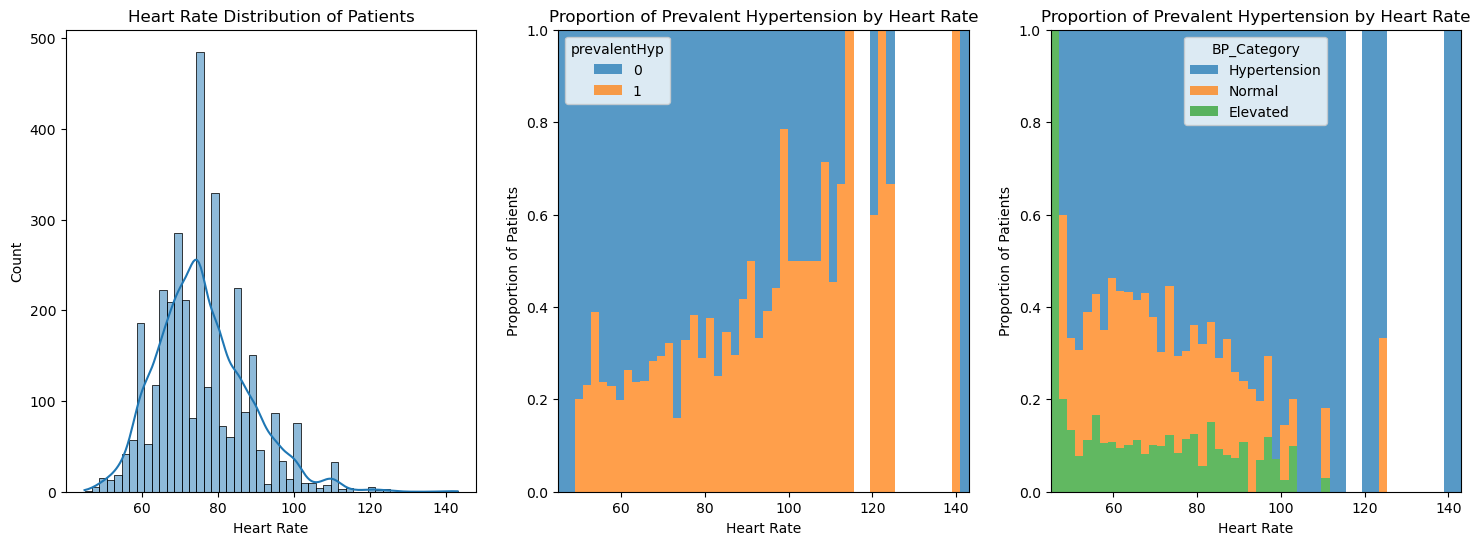

In [36]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(18,6))

# Heart Rate Distribution of Patients
sns.histplot(data=med_df, x='heartRate', kde=True, ax=ax0)
ax0.set_xlabel('Heart Rate')
ax0.set_title('Heart Rate Distribution of Patients')

# Proportion of Prevalent Hypertension by Heart Rate
sns.histplot(data=med_df, x='heartRate', hue='prevalentHyp', multiple='fill', edgecolor='none', ax=ax1)
ax1.set_xlabel('Heart Rate')
ax1.set_ylabel('Proportion of Patients')
ax1.set_title('Proportion of Prevalent Hypertension by Heart Rate')

# Proportion of Prevalent Hypertension by Heart Rate
sns.histplot(data=med_df, x='heartRate', hue='BP_Category', multiple='fill', edgecolor='none', ax=ax2)
ax2.set_xlabel('Heart Rate')
ax2.set_ylabel('Proportion of Patients')
ax2.set_title('Proportion of Prevalent Hypertension by Heart Rate')

plt.show()

The distribution plot on the left shows the population density of patients' heart rates, with the highest density occurring around 78 bpm. This indicates that a significant number of patients have heart rates within the normal range of 60-100 bpm.

The middle plot illustrates the proportion of patients with or without prevalent hypertension based on their heart rates. It reveals that as the heart rate increases, the proportion of patients with coronary heart disease (CHD) also tends to increase. This suggests a positive association between heart rate and the risk of hypertension.

The right plot displays the proportion of patients in different blood pressure categories based on their heart rates. It demonstrates that as the heart rate increases, the proportion of patients in the hypertension category also tends to increase. This underscores the impact of heart rate on the risk of hypertension.

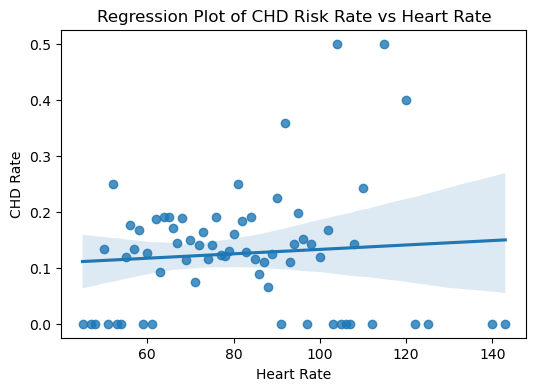

In [37]:
# Regression Plot of CHD Rate and Heart Rate
plt.figure(figsize=(6,4))
sns.regplot(x=med_df.groupby('heartRate')['TenYearCHD'].mean().index,
            y=med_df.groupby('heartRate')['TenYearCHD'].mean().values)
plt.xlabel('Heart Rate')
plt.ylabel('CHD Rate')
plt.title('Regression Plot of CHD Risk Rate vs Heart Rate')
plt.show()

Above is the regression line depicting the relationship between CHD rate and heart rate. Interestingly, despite the association between CHD rate and hypertension, the slope of the line indicates a less pronounced relationship between CHD and heart rate. The nearly horizontal slope suggests that the impact of heart rate on CHD rate may be minimal or insignificant.

#### 2.4.5 Glucose Level

Blood glucose level is a risk factor for diabetes, and it is typically measured using fasting blood glucose concentration. The **World Health Organization (WHO)** provides [risk categories](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/2380) based on the measured values, as follows:

|Status|Glucose Level (mg/dL)|
|--|--|
|Hypoglycemia|<70|
|Normal|70-99|
|At risk|100-125|
|Diabetes|≥126|

In [38]:
# Create categorical column
med_df.loc[(med_df['glucose'] < 70), 'Glucose_Category'] = 'Hypoglycemia'
med_df.loc[(med_df['glucose'] >= 70) & (med_df['glucose'] < 100), 'Glucose_Category'] = 'Normal'
med_df.loc[(med_df['glucose'] >= 100) & (med_df['glucose'] < 126), 'Glucose_Category'] = 'At risk'
med_df.loc[(med_df['glucose'] > 126), 'Glucose_Category'] = 'Diabetes'
# Define categorical colors
glucose_colors = {'Hypoglycemia': 'forestgreen', 'Normal': 'steelblue', 'At risk': 'darkorange', 'Diabetes': 'firebrick'}

<function matplotlib.pyplot.show(close=None, block=None)>

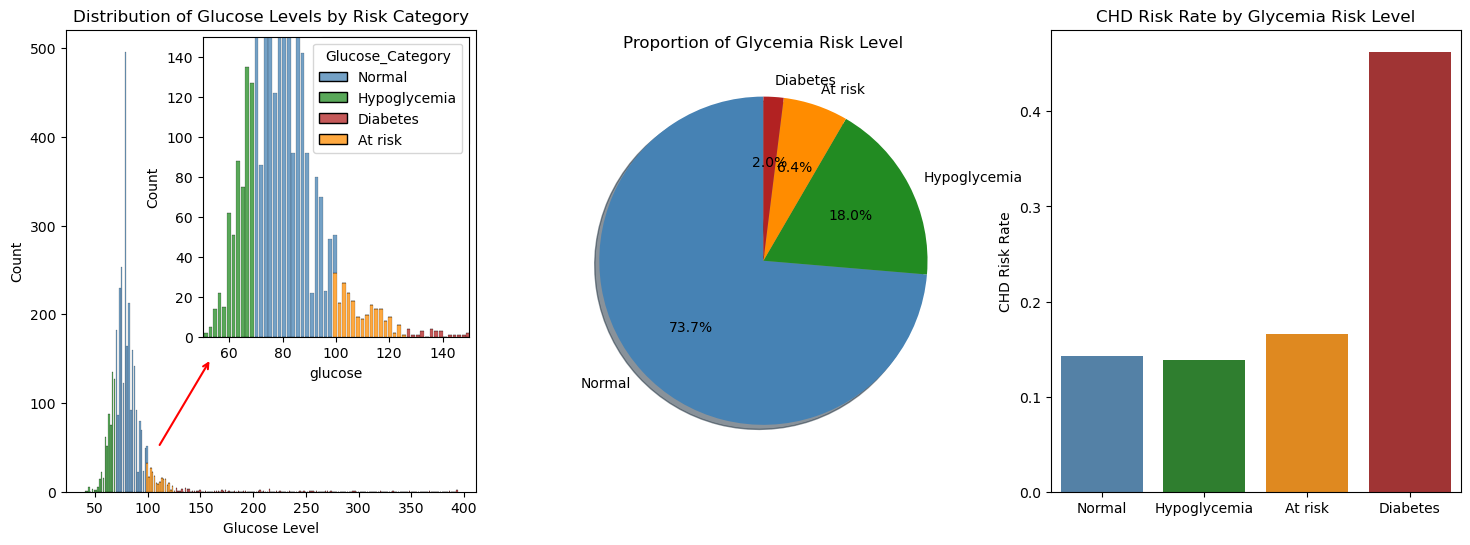

In [39]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(18,6))

# Distribution of Glucose Levels by Risk Category
sns.histplot(data=med_df, x='glucose', multiple='stack', hue='Glucose_Category', shrink=0.8, palette=glucose_colors, ax=ax0)
ax0.set_title('Distribution of Glucose Levels by Risk Category')
ax0.set_xlabel('Glucose Level')

ax_inset = inset_axes(ax0, width='65%', height='65%')
sns.histplot(data=med_df, x='glucose', multiple='stack', hue='Glucose_Category', shrink=0.8, palette=glucose_colors, ax=ax_inset)
ax_inset.set_xlim([50, 150])
ax_inset.set_ylim([0, 150])
arrowprops = {'arrowstyle': '->', 'linewidth': 1.5, 'color': 'red'}
ax0.annotate('', xy=(160, 150), xytext=(110, 50), arrowprops=arrowprops)

# Proportion of Glycemia Risk Level
ax1.pie(med_df['Glucose_Category'].value_counts(), labels=med_df['Glucose_Category'].value_counts().index,
        startangle=90, shadow=True, autopct='%.1f%%',
        colors=[glucose_colors[val] for val in med_df['Glucose_Category'].value_counts().index])
ax1.set_title('Proportion of Glycemia Risk Level')

# CHD Risk Rate by Glycemia Risk Level
med_df_sorted = med_df.sort_values(by='TenYearCHD')
sns.barplot(data=med_df_sorted, x='Glucose_Category',y='TenYearCHD', palette=glucose_colors, errorbar=None, ax=ax2)
ax2.set_xlabel('')
ax2.set_ylabel('CHD Risk Rate')
ax2.set_title('CHD Risk Rate by Glycemia Risk Level')

plt.show

From the histogram, we observe that the majority of patients are concentrated in the glucose level range of around 80 mg/dL. The left plot magnifies the area within the range of 50 to 150 mg/dL and displays the corresponding proportion of patients with CHD. From the proportion plot, we can observe that the glucose levels remain consistently below 100 mg/dL. However, as the risk level increases to the range of 100-125 mg/dL, the proportion of patients with CHD shows a tendency to increase. Furthermore, as the glucose level increases to the Diabetes category, the proportion of CHD patients sharply rises.

The right plot illustrates the CHD rate according to the risk categories. It reveals that patients in the at-risk glucose level category exhibit a similar CHD rate compared to those in the Normal and Hypoglycemia categories. However, patients in the Diabetes category have a significantly higher CHD rate of approximately 0.45, which is nearly three times higher than the rate in the other categories.

# *3. Data Preprocessing*

## 3.1 Separate Data

To remove the less relevant attributes from the dataframe, the following attributes will be dropped: 'is_smoking', 'cigsPerDay', 'TenYearCHD'. Additionally, 'prevalentStroke' will also be dropped due to the significant imbalance in the data between the classes.

In [40]:
# Separate feature and target and drop columns
X = df.drop(['heartRate', 'is_smoking', 'cigsPerDay', 'prevalentStroke', 'TenYearCHD'], axis=1)
Y = df['TenYearCHD'].to_numpy()

print('X shape: ', X.shape)
print('Y shape: ', Y.shape)

X shape:  (3390, 11)
Y shape:  (3390,)


## 3.2 One-Hot Encoder

In [41]:
# One-Hot Encoder
categorical = ['education', 'sex', 'BPMeds', 'prevalentHyp', 'diabetes']
X_OHE = pd.get_dummies(data=X, columns=categorical)

print('Shape before one-hot encoding: ',X_OHE.shape)
X_OHE.head()

Shape before one-hot encoding:  (3390, 18)


,age,totChol,sysBP,diaBP,BMI,glucose,education_1.0,education_2.0,education_3.0,education_4.0,sex_F,sex_M,BPMeds_0.0,BPMeds_1.0,prevalentHyp_0,prevalentHyp_1,diabetes_0,diabetes_1
0,64,221.0,148.0,85.0,25.38,80.0,0,1,0,0,1,0,1,0,1,0,1,0
1,36,212.0,168.0,98.0,29.77,75.0,0,0,0,1,0,1,1,0,0,1,1,0
2,46,250.0,116.0,71.0,20.35,94.0,1,0,0,0,1,0,1,0,1,0,1,0
3,50,233.0,158.0,88.0,28.26,94.0,1,0,0,0,0,1,1,0,0,1,1,0
4,64,241.0,136.5,85.0,26.42,77.0,1,0,0,0,1,0,1,0,1,0,1,0


## 3.3 Data Normalization

In [42]:
from sklearn import preprocessing

# Normalization
transform = preprocessing.StandardScaler()
X_transform = transform.fit_transform(X_OHE)
X_transform

array([[ 1.6827831 , -0.35653901,  0.69087885, ..., -0.67865848,
         0.16229507, -0.16229507],
       [-1.57621005, -0.55659428,  1.58819287, ...,  1.47349517,
         0.16229507, -0.16229507],
       [-0.41228392,  0.28808352, -0.74482357, ..., -0.67865848,
         0.16229507, -0.16229507],
       ...,
       [-0.64506915,  2.55537655,  1.40873006, ...,  1.47349517,
         0.16229507, -0.16229507],
       [ 1.21721265, -1.0233899 ,  1.54332716, ...,  1.47349517,
         0.16229507, -0.16229507],
       [ 0.51885698,  1.13276131, -0.38589796, ..., -0.67865848,
         0.16229507, -0.16229507]])

## 3.4 Sampling

Given the presence of multiple severely unbalanced categories in the Medical History dataset, the ADASYN sampler is employed in this work to tackle the issue of class imbalance. By generating synthetic samples, ADASYN assists in learning from the limited data available and addresses the challenges posed by the imbalanced distribution of classes.

In [43]:
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler

def adasyn_sampling(threshold):
    # ADASYN and RandomUnderSampler
    over_sampler = ADASYN(sampling_strategy=threshold, random_state=seed)
    under_sampler = RandomUnderSampler(sampling_strategy=1.0)
    
    # Perform over-sampling and under-sampling
    X_oversampled, Y_oversampled = over_sampler.fit_resample(X_transform, Y)
    X_sampled, Y_sampled = under_sampler.fit_resample(X_oversampled, Y_oversampled)
    
    return X_sampled, Y_sampled

X_sampled, Y_sampled = adasyn_sampling(0.5)

## 3.5 Train-Test Split

In [44]:
# Unsampled data is used as a control group to compare with the sampled data
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_transform, Y, test_size=0.2, random_state=seed)
print('Shape of training set: \n X_train ',X_train.shape, '\n Y_train ', Y_train.shape, '\n')
print('Shape of test set: \n X_test ', X_test.shape, '\n Y_test ', Y_test.shape)

Shape of training set: 
 X_train  (2712, 18) 
 Y_train  (2712,) 

Shape of test set: 
 X_test  (678, 18) 
 Y_test  (678,)


In [45]:
# Split sampled data
X_train_sampled, X_test_sampled, Y_train_sampled, Y_test_sampled = train_test_split(X_sampled, Y_sampled, test_size=0.2, random_state=seed)
print('Shape of training set: \n X_train ',X_train.shape, '\n Y_train ', Y_train.shape, '\n')
print('Shape of test set: \n X_test ', X_test.shape, '\n Y_test ', Y_test.shape)

Shape of training set: 
 X_train  (2712, 18) 
 Y_train  (2712,) 

Shape of test set: 
 X_test  (678, 18) 
 Y_test  (678,)


# *4. Models and Evaluation*

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import metrics

In this project, Random Forest and XGBoost models will be trained to handle attributes with multiple categories in our data. These models are known for their effectiveness in classification and regression tasks. Random Forest combines predictions from multiple trees to provide stable results, while XGBoost optimizes decision trees to enhance predictive performance. These models are being chosen to effectively handle attributes with multiple categories in our dataset, ensuring accurate and reliable results.

In [47]:
# Define models and evaluation
def train_models(X_train, Y_train, X_test, Y_test):
    models = {'Random Forest': RandomForestClassifier(random_state=seed),
              'XGBoost': XGBClassifier(random_state=seed)}

    training_results = []
    for name, model in models.items():
        Yhat = model.fit(X_train, Y_train).predict(X_test)
 
        accuracy = metrics.accuracy_score(Y_test, Yhat)
        jaccard_index = metrics.jaccard_score(Y_test, Yhat)
        precision = metrics.precision_score(Y_test, Yhat)
        recall = metrics.recall_score(Y_test, Yhat)
        f1_score = metrics.f1_score(Y_test, Yhat)
    
        training_results.append({'Model': name,
                                 'Accuracy': '{:.2f}'.format(accuracy),
                                 'Jaccard Index': '{:.2f}'.format(jaccard_index),
                                 'Precision': '{:.2f}'.format(precision),
                                 'Recall': '{:.2f}'.format(recall),
                                 'F1 Score': '{:.2f}'.format(f1_score)})
    training_df = pd.DataFrame(training_results)
    return training_df

## 4.1 Training Results

In [48]:
# Original data (control)
train_models(X_train, Y_train, X_test, Y_test)

,Model,Accuracy,Jaccard Index,Precision,Recall,F1 Score
0,Random Forest,0.85,0.07,0.47,0.08,0.13
1,XGBoost,0.82,0.09,0.29,0.12,0.17


In [49]:
# Sampled data
train_models(X_train_sampled, Y_train_sampled, X_test_sampled, Y_test_sampled)

,Model,Accuracy,Jaccard Index,Precision,Recall,F1 Score
0,Random Forest,0.81,0.70,0.80,0.85,0.83
1,XGBoost,0.80,0.68,0.80,0.81,0.81


From the training results, it can be observed that both the sampled and unsampled data have good accuracy. However, when evaluating other metrics, the unsampled data perform poorly, indicating that the model trained with unsampled data has a limited ability to correctly predict the specific category due to the class imbalance.

On the other hand, the sampled data demonstrate better performance in all metrics except accuracy compared to the unsampled data. When comparing the results of the Random Forest and XGBoost models, both models exhibit similar outcomes in terms of precision and recall, with Random Forest showing slightly higher recall. It is worth noting that the Jaccard index is not as favorable as the other metrics, suggesting that the predicted results are only about 67% similar to the correct results.

Overall, the results show the effectiveness of sampling techniques, such as ADASYN and Random Under Sampling, in improving the performance of the models on imbalanced datasets. The sampled data yields better precision, recall, and accuracy, indicating a higher ability to correctly classify the minority category. However, further improvements may be needed to enhance the Jaccard index, which measures the similarity between predicted and true labels.

## 4.2 Confusion Matrix

In [50]:
# Define plotting confusion matrix
def plot_cm(X_train, Y_train, X_test, Y_test, normalize):
    models = {'Random Forest': RandomForestClassifier(random_state=seed),
              'XGBoost': XGBClassifier(random_state=seed)}

    for i, (model_name, model) in enumerate(models.items()):
        model.fit(X_train, Y_train)
        disp = metrics.ConfusionMatrixDisplay.from_estimator(model, X_test, Y_test, cmap=plt.cm.Blues, normalize=normalize)
        disp.ax_.set_title('Confusion Matrix: {}'.format(model_name))

    plt.show()

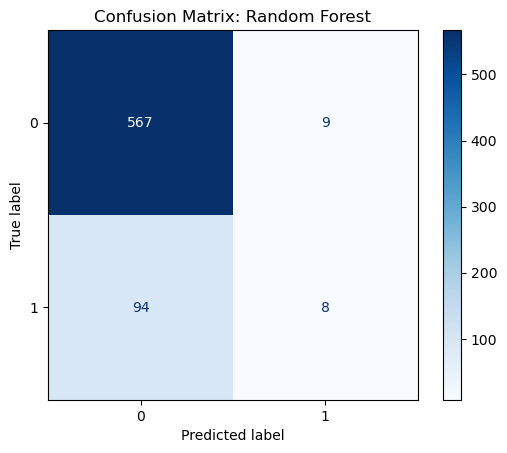

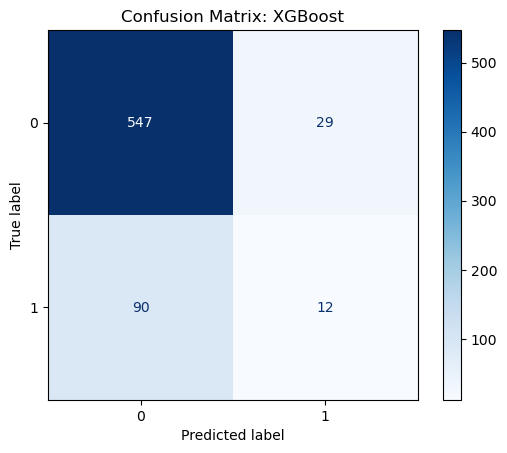

In [51]:
# Control
plot_cm(X_train, Y_train, X_test, Y_test, None)

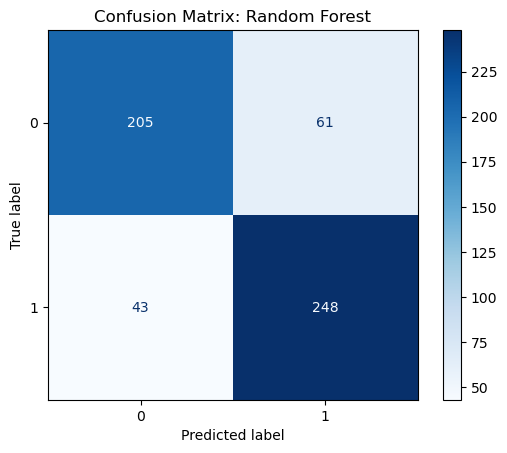

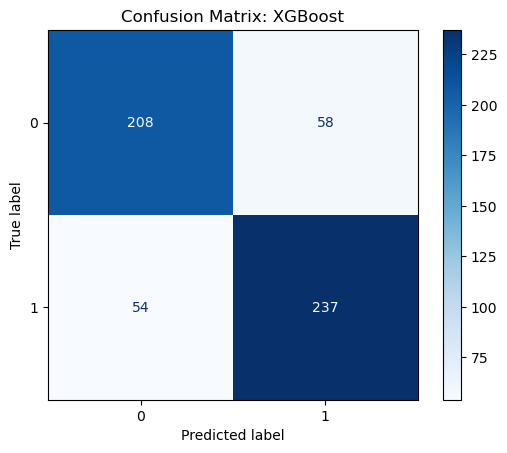

In [52]:
# Sampled
plot_cm(X_train_sampled, Y_train_sampled, X_test_sampled, Y_test_sampled, None)

Based on the confusion matrix, the control set exhibits a significant imbalance in predictions, with a majority of instances being classified as True Negatives. This imbalance leads to poor precision, recall, and Jaccard scores, indicating that the model struggles to correctly identify positive instances.

In contrast, the results obtained from the sampled data show a considerable improvement in prediction accuracy. The sampled data leads to a more balanced classification, with a substantial number of instances correctly classified as both True Negatives and True Positives. When comparing the two models, the Random Forest model demonstrates a higher proficiency in predicting Type I instances, while the XGBoost model excels in handling the Type II error problem. However, in terms of overall performance, the XGBoost model proves to be superior due to its ability to correctly identify a higher number of True Negative instances.

The results demonstrate the effectiveness of sampling techniques in improving the overall performance of the models. The sampled data results in a more balanced classification, reducing both Type I and Type II errors. Nevertheless, further analysis and optimization may be required to achieve a better balance between precision and recall for both positive and negative instances.

## 4.3 Precision-Recall Curve

In [53]:
# Display the AUC of each model
def ap_plot(X_train, Y_train, X_test, Y_test):
    models = {'Random Forest': RandomForestClassifier(random_state=seed),
              'XGBoost': XGBClassifier(random_state=seed)}
    colors = ['b', 'r']
    fig, axis = plt.subplots(1, 2, figsize=(12, 6))
    
    for i, (model_name, model) in enumerate(models.items()):
        Yhat = model.fit(X_train, Y_train).predict_proba(X_test)[:, 1]
        precision, recall, _ = metrics.precision_recall_curve(Y_test, Yhat)
        average_precision = metrics.average_precision_score(Y_test, Yhat)   
        
        ax=axis[i]
        ax.step(recall, precision, color=colors[i], alpha=0.2, where='post')
        ax.fill_between(recall, precision, step='post', alpha=0.2, color=colors[i])
        ax.set_xlabel('Recall')
        ax.set_ylabel('Precision')
        ax.set_ylim([0.0, 1.0])
        ax.set_xlim([0.0, 1.0])
        ax.set_title('Precision-Recall Curve: {}  AP={:.2f}'.format(model_name, average_precision))
        
    plt.show()

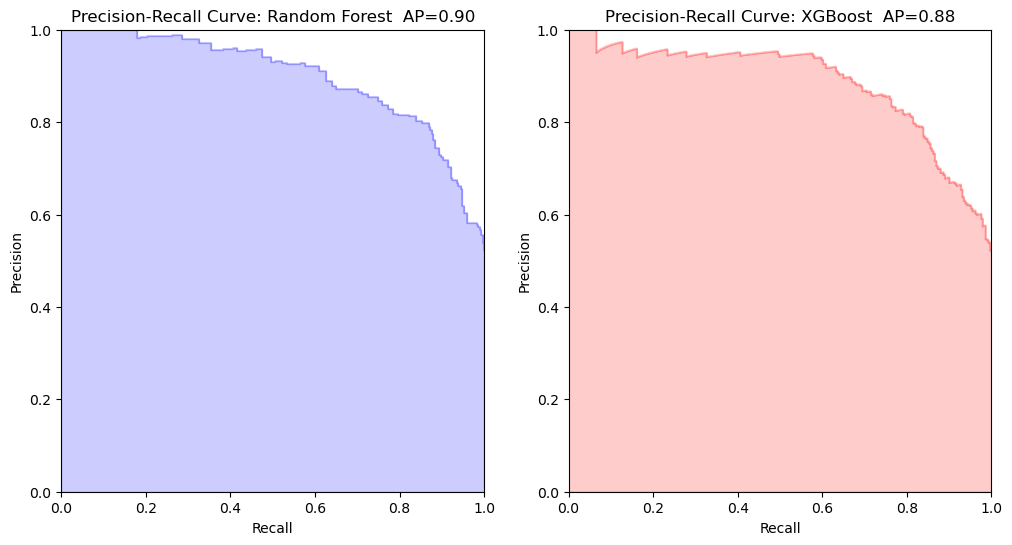

In [54]:
# Sampled Data
ap_plot(X_train_sampled, Y_train_sampled, X_test_sampled, Y_test_sampled)

The Precision-Recall Curve reveals that the area under the curve (AUC) and the average precision (AP) for both models are similar. This indicates that the precision changes consistently as the recall varies. The AP value of approximately 0.9 for both models indicates a consistently high precision across multiple thresholds.

## 4.4 Optimization

In this section, we will focus on tuning the ratio of the oversampler using ADASYN sampling. The precision-recall curve will be plotted for each ratio threshold, to understand the impact of different ratios on the model's performance.

In [55]:
def adasyn_threshold(model):
    thresholds = list(np.arange(0.3, 0.9, 0.1))
    plt.figure(figsize=(8, 6))

    for threshold in thresholds:
        # ADASYN and RandomUnderSampler
        over_sampler = ADASYN(sampling_strategy=threshold, random_state=seed)
        under_sampler = RandomUnderSampler(sampling_strategy=1.0)

        # Perform over-sampling and under-sampling
        X_oversampled, Y_oversampled = over_sampler.fit_resample(X_transform, Y)
        X_sampled, Y_sampled = under_sampler.fit_resample(X_oversampled, Y_oversampled)

        model.fit(X_sampled, Y_sampled)
        Y_prob = model.predict_proba(X_test)[:, 1]
        precision, recall, _ = metrics.precision_recall_curve(Y_test, Y_prob)

        plt.plot(recall, precision, label='ADASYN Threshold={}'.format(round(threshold, 2)))

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve for Different ADASYN Thresholds')
    plt.legend(loc='lower left')
    plt.grid(True)
    plt.show()

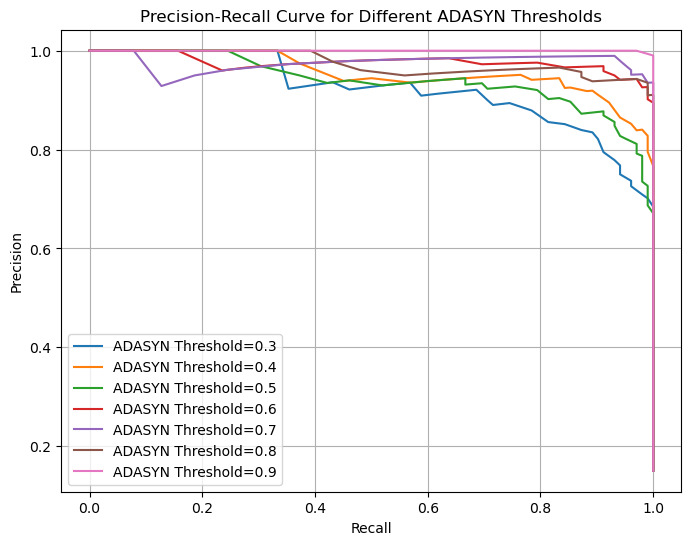

In [56]:
model = RandomForestClassifier()
adasyn_threshold(model)

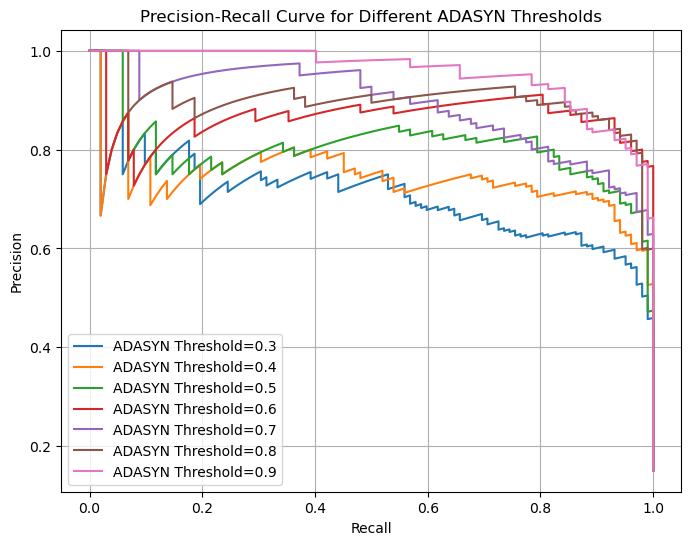

In [57]:
model = XGBClassifier()
adasyn_threshold(model)

The optimal threshold is selected based on the precision-recall plot, aiming for the curve closest to the top-right corner, which often corresponds to the largest AUC and highest AP. Upon comparing the precision-recall plots of each model, it is observed that both models have an optimal threshold of 0.9. However, the XGBoost model's curve exhibits turbulence as the recall increases, resulting in a lower AUC. Conversely, the Random Forest model's curve is smoother at this threshold and closer to the corner, indicating potentially better performance. Let's examine the scores and results at this threshold.

In [58]:
# Sampling, Model training, Evaluation Pipeline
def pipeline(threshold):
    X_sampled, Y_sampled = adasyn_sampling(threshold)
    X_train, X_test, Y_train, Y_test = train_test_split(X_sampled, Y_sampled, test_size=0.2, random_state=seed)
    results_df = train_models(X_train, Y_train, X_test, Y_test)
    print(results_df)
    plot_cm(X_train, Y_train, X_test, Y_test, None)
    ap_plot(X_train, Y_train, X_test, Y_test)

In [59]:
# Before Tuning
train_models(X_train_sampled, Y_train_sampled, X_test_sampled, Y_test_sampled)

,Model,Accuracy,Jaccard Index,Precision,Recall,F1 Score
0,Random Forest,0.81,0.70,0.80,0.85,0.83
1,XGBoost,0.80,0.68,0.80,0.81,0.81


           Model Accuracy Jaccard Index Precision Recall F1 Score
0  Random Forest     0.88          0.79      0.85   0.92     0.88
1        XGBoost     0.89          0.80      0.92   0.86     0.89


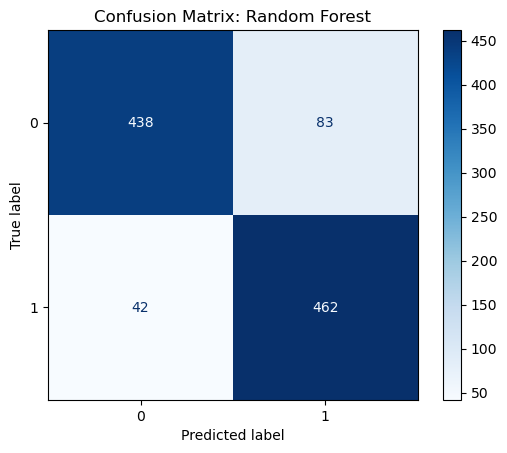

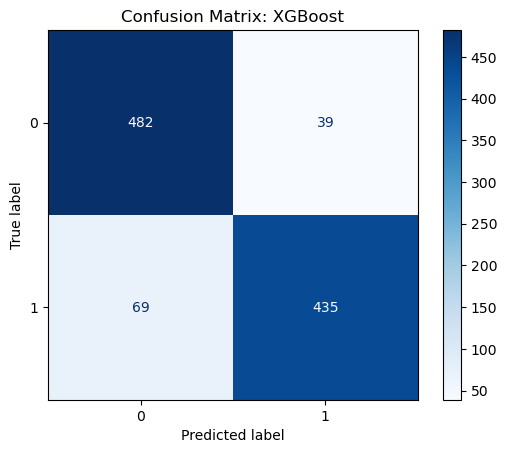

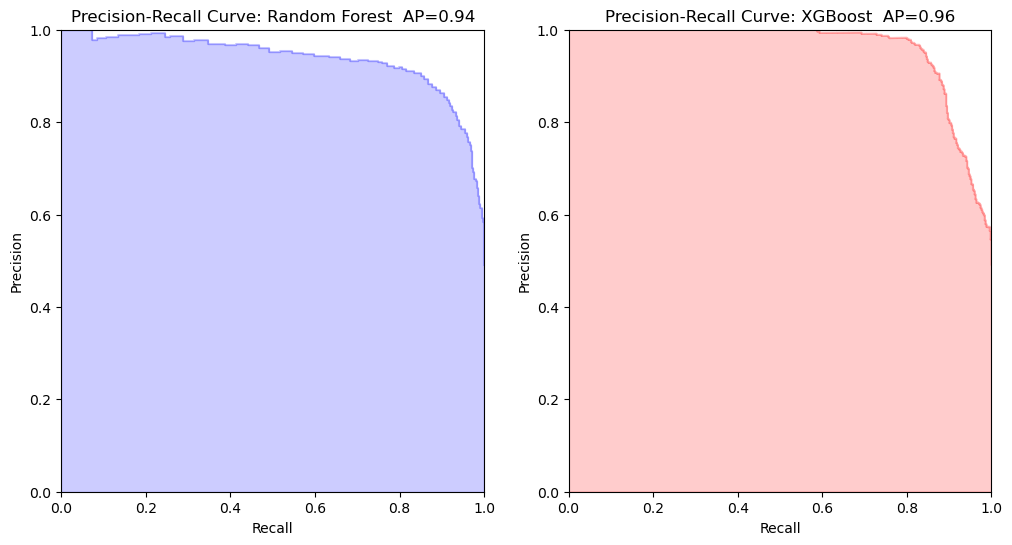

In [60]:
# After Tuning
pipeline(0.9)

Comparing the scores before and after optimization, we can observe significant enhancements in both models. Both models achieved an accuracy of up to 0.88, indicating a substantial improvement in overall prediction accuracy. Additionally, the Jaccard index also improved to around 0.8, suggesting a higher similarity between the model's predicted results and the actual results.

The F1 score ( the harmonic mean of precision and recall) is the same for both models. However, the Random Forest model has a higher recall, while the XGBoost model has a higher precision.

A higher recall model prioritizes finding all positive examples, aiming to reduce the number of False Negatives. This is valuable in scenarios where it is crucial to identify as many positive instances as possible, even if it will have a higher number of false positives.

On the other hand, a higher precision model focuses on correctly predicting positive cases, aiming to reduce the number of False Positives. This is particularly important in applications such as medical diagnosis, where the goal is to minimize the risk of misdiagnosis. The high-precision model provides more reliable prediction results, but there is a possibility of missing some actual positive examples.

## 4.4 Conclusion

In conclusion, the evaluation of the models on both sampled and unsampled data revealed that the sampled data consistently outperformed the unsampled data in terms of precision, recall, and overall performance. The sampled data, obtained through techniques such as ADASYN and Random Under Sampling, effectively balanced the class distribution and mitigated the impact of class imbalance.

Comparing the Random Forest and XGBoost models, both models demonstrated similar outcomes in the F1 score. However, the XGBoost model exhibited higher precision, indicating a lower rate of False Positives (Type I error) and a reduced risk of misdiagnosis.  Therefore, based on the objective of reducing misdiagnosis and ensuring a high precision rate, the XGBoost model would be the preferred option for predicting CHD risk in patients.

Thanks for your reading. :)